In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import tensorflow as tf
import numpy as np
import os


2023-11-29 09:54:45.201897: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 09:54:45.568691: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-29 09:54:45.641942: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-29 09:54:45.641967: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# Load the dataset
file_path = '/root/code/ML_vs_Cancer/raw_data/train_labels.csv'
data = pd.DataFrame(pd.read_csv(file_path))
data.info


<bound method DataFrame.info of                                               id  label
0       f38a6374c348f90b587e046aac6079959adf3835      0
1       c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2       755db6279dae599ebb4d39a9123cce439965282d      0
3       bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4       068aba587a4950175d04c680d38943fd488d6a9d      0
...                                          ...    ...
220020  53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6      0
220021  d4b854fe38b07fe2831ad73892b3cec877689576      1
220022  3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75      0
220023  f129691c13433f66e1e0671ff1fe80944816f5a2      0
220024  a81f84895ddcd522302ddf34be02eb1b3e5af1cb      1

[220025 rows x 2 columns]>

In [3]:
data.describe()


label
count  220025.000000
mean        0.405031
std         0.490899
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000

In [4]:
# Count of each label
label_counts = data['label'].value_counts()
label_counts


label
0    130908
1     89117
Name: count, dtype: int64

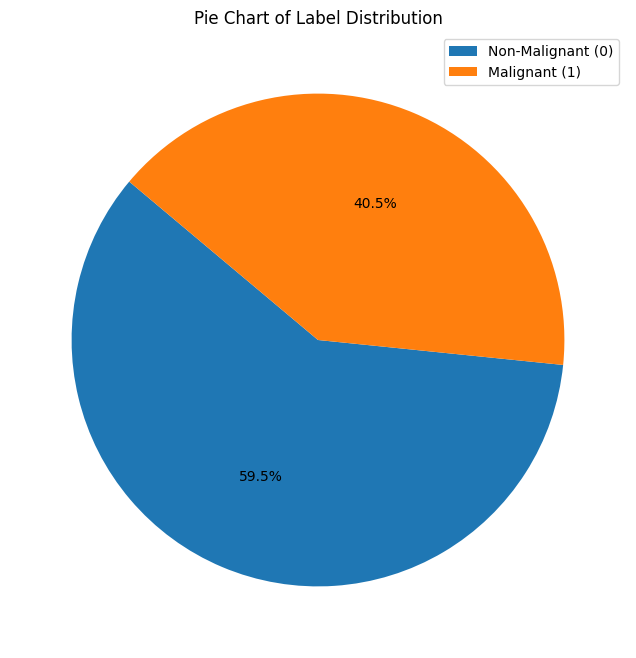

In [5]:
# Pie chart of label distribution with labels
labels = ['Non-Malignant (0)', 'Malignant (1)']
plt.figure(figsize=(8, 8))
plt.pie(label_counts, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Label Distribution')
plt.legend(labels)
plt.show()


In [5]:
# Check for duplicates
print('Number of duplicate rows:', data.duplicated().sum())
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values in each column:\n', missing_values)


Number of duplicate rows: 0
Missing values in each column:
 id       0
label    0
dtype: int64


In [6]:
# Filter the DataFrame for malignant and non_malignant cases
malignant = data.loc[data['label'] == 1]['id'].values
non_malignant = data.loc[data['label'] == 0]['id'].values

print('Malignant IDs:', malignant)
print('Non-malignant IDs:', non_malignant)


Malignant IDs: ['c18f2d887b7ae4f6742ee445113fa1aef383ed77'
 'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da'
 '7f6ccae485af121e0b6ee733022e226ee6b0c65f' ...
 '309210db7f424edbc22b2d13bf2fa27518b18f5c'
 'd4b854fe38b07fe2831ad73892b3cec877689576'
 'a81f84895ddcd522302ddf34be02eb1b3e5af1cb']
Non-malignant IDs: ['f38a6374c348f90b587e046aac6079959adf3835'
 '755db6279dae599ebb4d39a9123cce439965282d'
 'bc3f0c64fb968ff4a8bd33af6971ecae77c75e08' ...
 '53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6'
 '3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75'
 'f129691c13433f66e1e0671ff1fe80944816f5a2']


In [7]:
imgpath = "/root/code/ML_vs_Cancer/images"


In [8]:
def plot_fig(ids, title, nrows=5, ncols=15):
    """
    Plots a grid of images.
    """
    fig, ax = plt.subplots(nrows, ncols, figsize=(18, 6))
    plt.subplots_adjust(wspace=0, hspace=0)

    for i, j in enumerate(ids[:nrows * ncols]):
        fname = os.path.join(imgpath, j + '.tif')
        img = Image.open(fname)
        idcol = ImageDraw.Draw(img)
        idcol.rectangle(((0, 0), (95, 95)), outline='white')

        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(np.array(img))
        plt.axis('off')

    plt.suptitle(title, y=0.94, fontsize=14)
    plt.show()


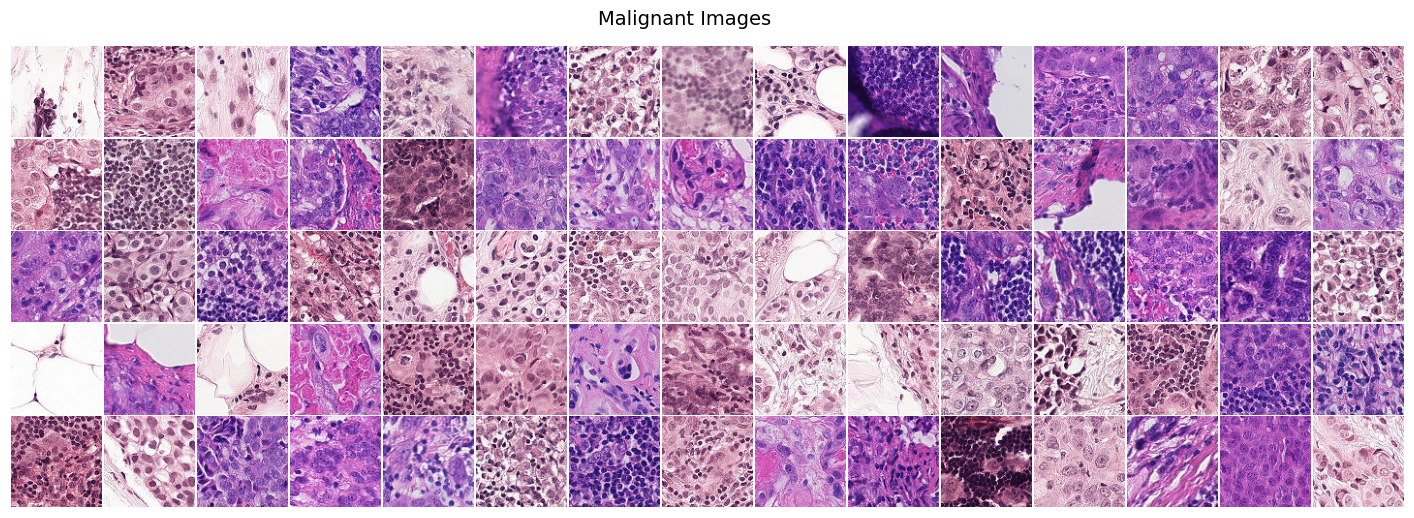

In [9]:
# add grid plot malignant
plot_fig(malignant, "Malignant Images")


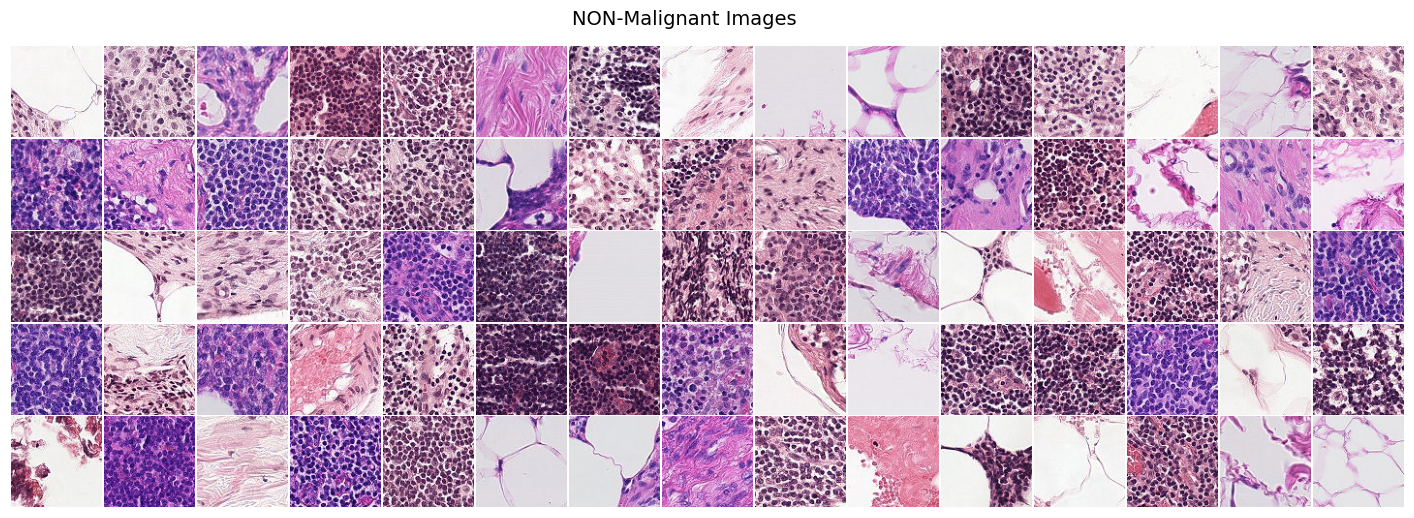

In [10]:
# add grid plot non-malignant
plot_fig(non_malignant, "NON-Malignant Images")


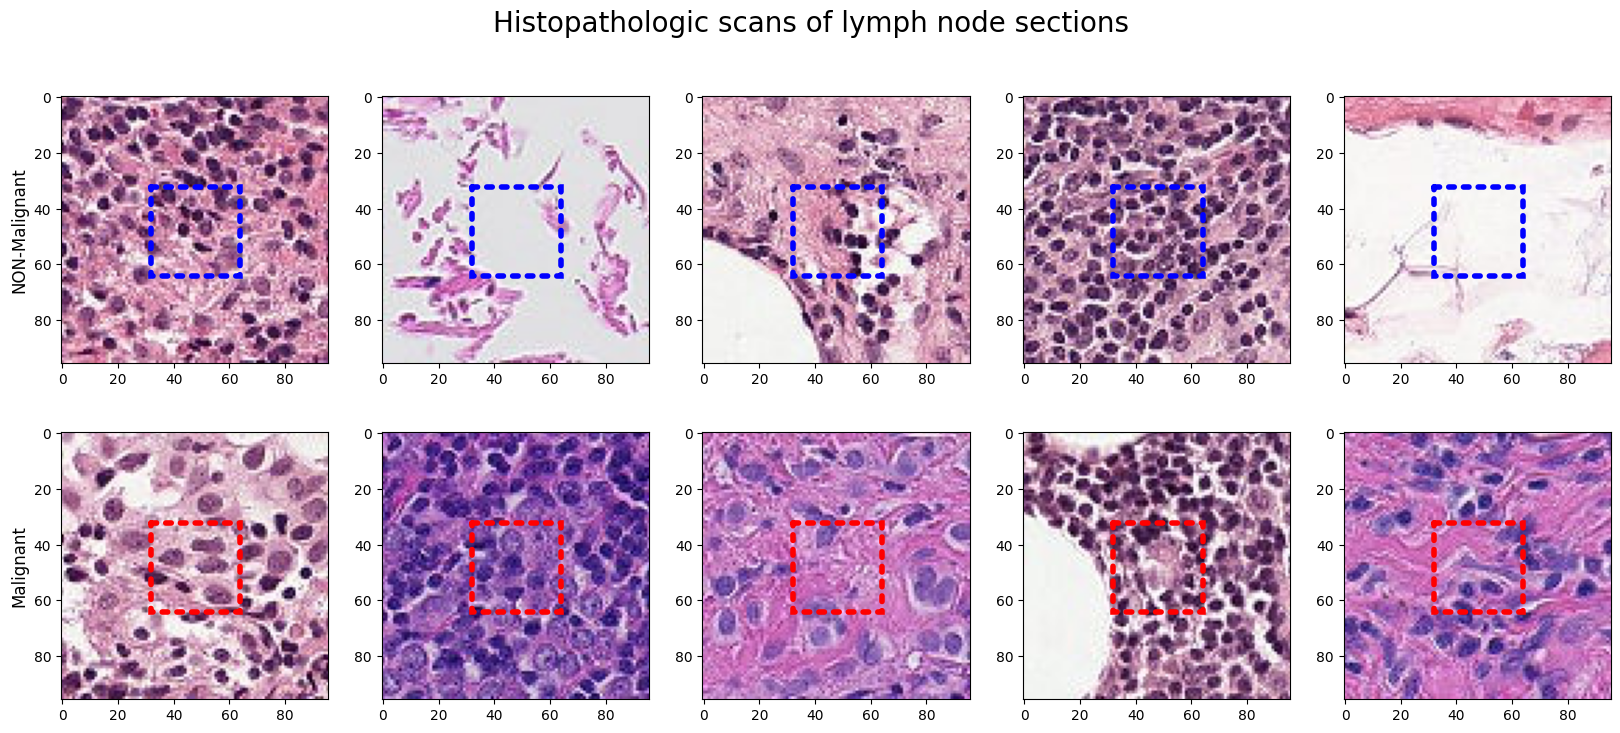

In [11]:
def plot_image_with_box(ax, idx, edgecolor, imgpath):
    path = os.path.join(imgpath, idx + '.tif')
    # Read and display the image
    img = Image.open(path)
    ax.imshow(img)
    # Draw a rectangle
    ax.add_patch(plt.Rectangle((32, 32), 32, 32, fill=False, edgecolor=edgecolor, linewidth=4, linestyle=':', capstyle='round'))

# Shuffle the data
shuffled_data = data.sample(frac=1).reset_index(drop=True)

fig, ax = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Histopathologic scans of lymph node sections', fontsize=20)

# Plot images
for row, label in enumerate([0, 1]):
    for i, idx in enumerate(shuffled_data[shuffled_data['label'] == label]['id'][:5]):
        color = 'b' if label == 0 else 'r'
        plot_image_with_box(ax[row, i], idx, color, imgpath)
    ylabel = 'NON-Malignant' if label == 0 else 'Malignant'
    ax[row, 0].set_ylabel(ylabel, size='large')

plt.show()


In [12]:
# D
def crop_image_tensorflow(img_path, target_size):
    '''the label of the image is influenced only by the center region (32 x 32px) so it would make sense to crop our data to that region only.
    However, some useful information about the surroundings could be lost if we crop too close. '''
    with Image.open(img_path) as img:
        img_array = np.array(img)
        img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8) # Convert the NumPy array to a TensorFlow tensor
        img_cropped = tf.image.resize_with_crop_or_pad(img_tensor, target_size[0], target_size[1])
        return img_cropped


Cropped image size: (32, 32, 3)


2023-11-29 09:57:07.432683: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:f3:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-29 09:57:07.436123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-29 09:57:07.436219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-11-29 09:57:07.436263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-11-29 09:57:07.436299: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

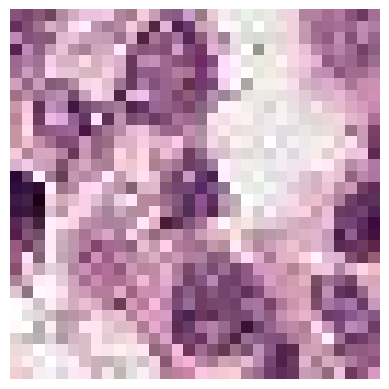

Cropped image size: (32, 32, 3)


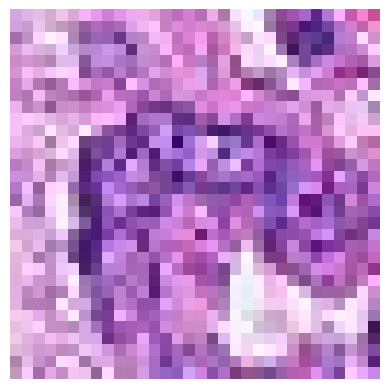

In [13]:
valid_image_extension = '.tif'

# Use filter to find .tif files and get two images
tif_files_iterator = filter(lambda f: f.lower().endswith(valid_image_extension), os.listdir(imgpath))
tif_files = [next(tif_files_iterator, None) for _ in range(2)]

# Desired output size
target_size = (32, 32)

for tif_file in tif_files:
    first_image_path = os.path.join(imgpath, tif_file)
    cropped_img = crop_image_tensorflow(first_image_path, target_size)
    cropped_img_np = cropped_img.numpy()
    print("Cropped image size:", cropped_img_np.shape)
    plt.imshow(cropped_img_np)
    plt.axis('off')
    plt.show()
